<a href="https://colab.research.google.com/github/cutepuppy2024/Co_Lab_upload/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data[:,:2]
y = iris.target

In [ ]:
X = X[y != 0]
y = y[y != 0]

In [ ]:
def make_meshgrid(x,y, h= 0.02):  # 조합가능한 모든 특징
  x_min, x_max = x.min() -1, x.max() +1
  y_min, y_max = y.min() -1, y.min() +1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  return xx, yy

In [ ]:
def plot_contours(clf, xx, yy, **params): # 입력가능한 함수들을 분류
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)
  return out
  # 2개의 함수를 통해 어떤 특징에서 class가 바뀌는지 decision boundary를 알 수 있음

In [ ]:
# 특징조합
X0, X1 = X[:,0], X[:,1]
xx, yy = make_meshgrid(X0, X1)

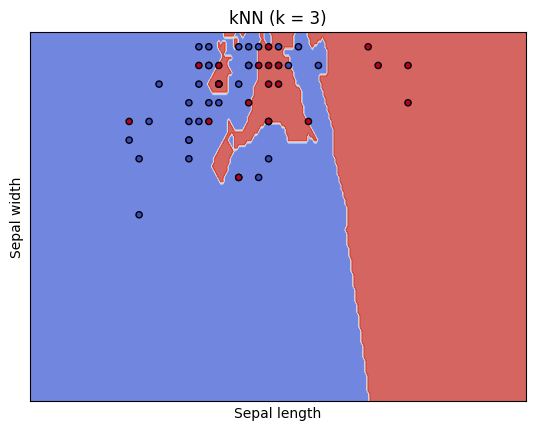

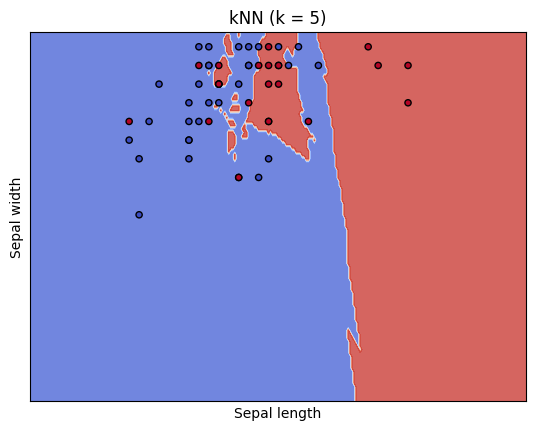

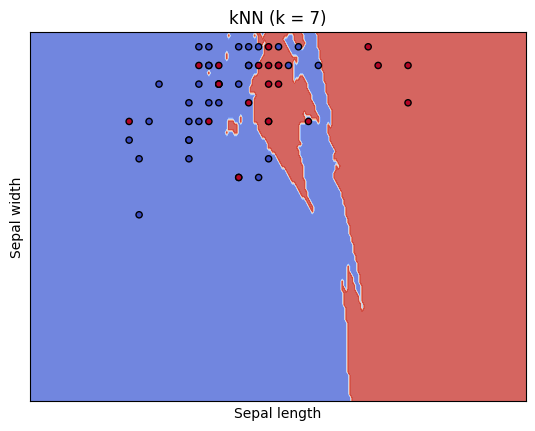

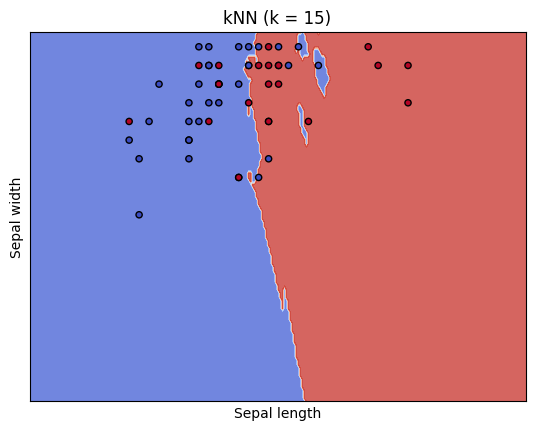

In [ ]:
for k in [3,5,7,15]:
  clf = KNeighborsClassifier(k)
  clf.fit(X,y)

  plot_contours(clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

  plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xticks(())
  plt.yticks(())
  plt.title(f'kNN (k = {k})')
  plt.show()